In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df_car = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data', header=None)

### Exploración de datos

In [10]:
columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df_car.columns = columns

In [13]:
pd.DataFrame({
    "nulls": df_car.isnull().sum(),
    "data type": df_car.dtypes,
    "nunique": df_car.nunique()
})

,nulls,data type,nunique
buying,0,object,4
maint,0,object,4
doors,0,object,4
persons,0,object,3
lug_boot,0,object,3
safety,0,object,3
class,0,object,4


In [14]:
df_car["buying"].value_counts()

buying
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64

In [15]:
df_car["class"].value_counts()

class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64

### Procesamiento de datos

In [21]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()

df_car_encoded = pd.DataFrame(encoder.fit_transform(df_car), columns=columns)

In [24]:
df_car_encoded

,buying,maint,doors,persons,lug_boot,safety,class
0,3.0,3.0,0.0,0.0,2.0,1.0,2.0
1,3.0,3.0,0.0,0.0,2.0,2.0,2.0
2,3.0,3.0,0.0,0.0,2.0,0.0,2.0
3,3.0,3.0,0.0,0.0,1.0,1.0,2.0
4,3.0,3.0,0.0,0.0,1.0,2.0,2.0
...,...,...,...,...,...,...,...
1723,1.0,1.0,3.0,2.0,1.0,2.0,1.0
1724,1.0,1.0,3.0,2.0,1.0,0.0,3.0
1725,1.0,1.0,3.0,2.0,0.0,1.0,2.0
1726,1.0,1.0,3.0,2.0,0.0,2.0,1.0


In [28]:
X, y = df_car_encoded.drop(columns=["class"]), df_car_encoded["class"]

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [30]:
X_train

,buying,maint,doors,persons,lug_boot,safety
1178,2.0,2.0,3.0,1.0,0.0,0.0
585,0.0,0.0,1.0,2.0,2.0,1.0
1552,1.0,2.0,1.0,1.0,1.0,2.0
1169,2.0,2.0,3.0,0.0,0.0,0.0
1033,2.0,0.0,2.0,0.0,0.0,2.0
...,...,...,...,...,...,...
1130,2.0,2.0,1.0,2.0,1.0,0.0
1294,2.0,1.0,3.0,2.0,0.0,2.0
860,0.0,1.0,3.0,2.0,1.0,0.0
1459,1.0,0.0,2.0,0.0,2.0,2.0


### Definición y entrenamiento del modelo

In [50]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(
    max_depth=5,
    random_state=42
)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [51]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

y_pred = model.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred, average='weighted')}")
print(f"Precision: {precision_score(y_test, y_pred, average='weighted')}")
print(f"F1: {f1_score(y_test, y_pred, average='weighted')}")

Accuracy: 0.8631984585741811
Recall: 0.8631984585741811
Precision: 0.8473238187801593
F1: 0.851329146126834


/home/santi/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


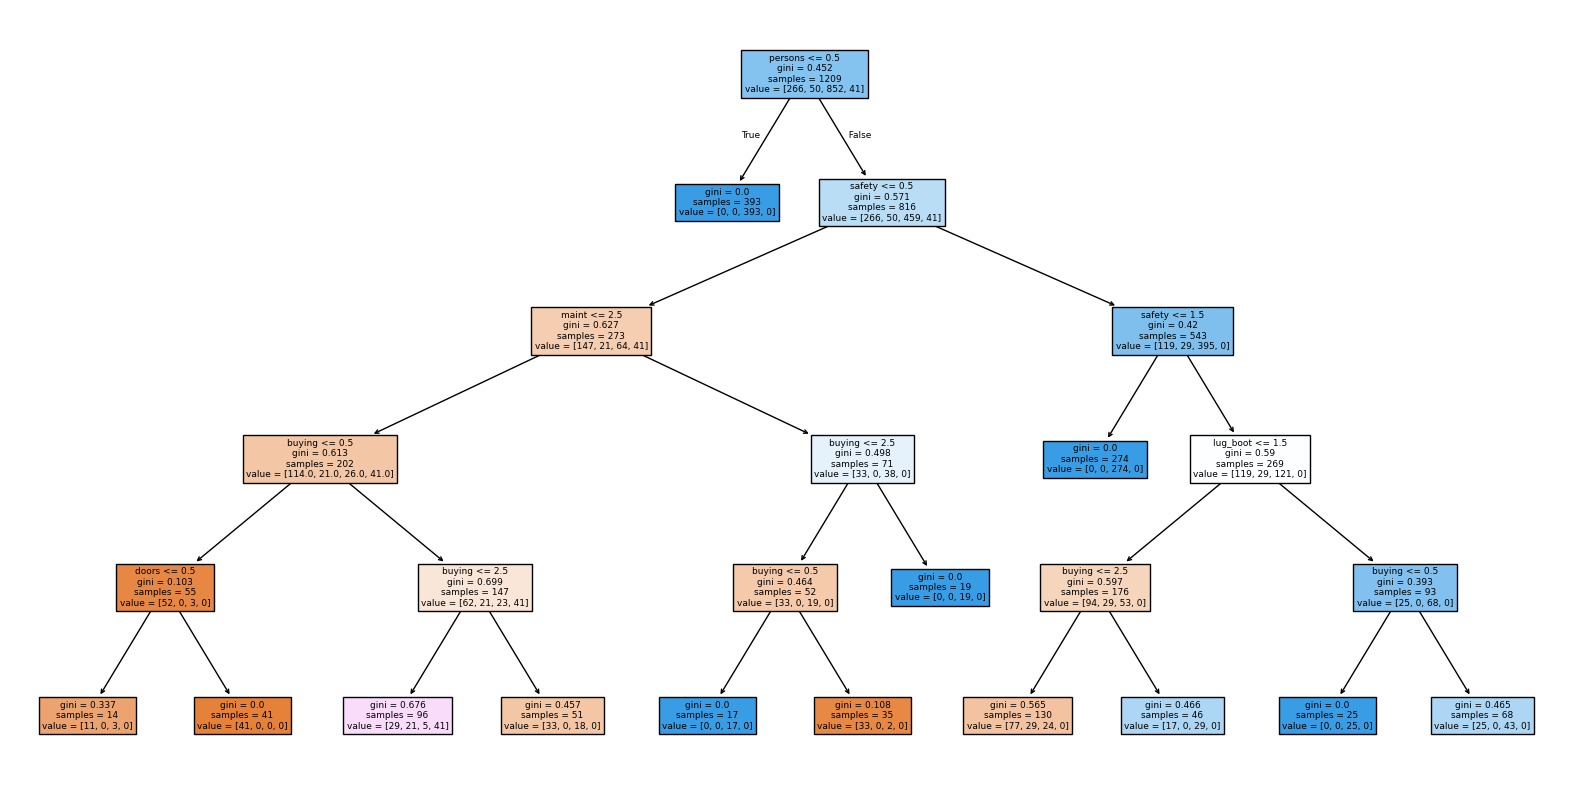

In [52]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=columns, filled=True)
plt.show()

In [53]:
pd.DataFrame({
    "feature": columns[:-1],
    "importance": model.feature_importances_
}).sort_values("importance", ascending=False)

,feature,importance
5,safety,0.420856
3,persons,0.249296
0,buying,0.236838
4,lug_boot,0.053145
1,maint,0.036901
2,doors,0.002964


In [62]:
from sklearn.metrics import make_scorer, recall_score, precision_score, f1_score
from sklearn.model_selection import GridSearchCV

param_grid = {
    "max_depth": np.arange(1, 20)
}

grid = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid,
    scoring={
        "precision": make_scorer(precision_score, average="weighted", zero_division=0),
        "f1": make_scorer(f1_score, average="weighted"),
        "recall": make_scorer(recall_score, average="weighted")
    },
    refit="recall",
    cv=5
)

In [63]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])},
             refit='recall',
             scoring={'f1': make_scorer(f1_score, response_method='predict', average=weighted),
                      'precision': make_scorer(precision_score, response_method='predict', average=weighted, zero_division=0),
                      'recall': make_scorer(recall_score, response_method='predict', average=weighted)})

In [64]:
pd.DataFrame(grid.cv_results_).sort_values("rank_test_recall")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_precision,split1_test_precision,split2_test_precision,split3_test_precision,...,std_test_f1,rank_test_f1,split0_test_recall,split1_test_recall,split2_test_recall,split3_test_recall,split4_test_recall,mean_test_recall,std_test_recall,rank_test_recall
11,0.003206,0.000609,0.007796,0.001010,12,{'max_depth': 12},0.984515,0.968633,0.979520,0.979687,...,0.008899,1,0.983471,0.966942,0.979339,0.979339,0.962656,0.974349,0.008057,1
18,0.005088,0.001319,0.010515,0.003758,19,{'max_depth': 19},0.980535,0.968633,0.979520,0.979687,...,0.008116,2,0.979339,0.966942,0.979339,0.979339,0.962656,0.973523,0.007251,2
16,0.003305,0.000916,0.007896,0.001235,17,{'max_depth': 17},0.980535,0.968633,0.979520,0.979687,...,0.008116,2,0.979339,0.966942,0.979339,0.979339,0.962656,0.973523,0.007251,2
15,0.002965,0.000913,0.008701,0.001652,16,{'max_depth': 16},0.980535,0.968633,0.979520,0.979687,...,0.008116,2,0.979339,0.966942,0.979339,0.979339,0.962656,0.973523,0.007251,2
14,0.003229,0.000943,0.008784,0.001712,15,{'max_depth': 15},0.980535,0.968633,0.979520,0.979687,...,0.008116,2,0.979339,0.966942,0.979339,0.979339,0.962656,0.973523,0.007251,2
13,0.003138,0.000914,0.007631,0.001000,14,{'max_depth': 14},0.980535,0.968633,0.979520,0.979687,...,0.008116,2,0.979339,0.966942,0.979339,0.979339,0.962656,0.973523,0.007251,2
12,0.003255,0.001074,0.008342,0.001153,13,{'max_depth': 13},0.980535,0.968633,0.979520,0.979687,...,0.008116,2,0.979339,0.966942,0.979339,0.979339,0.962656,0.973523,0.007251,2
17,0.003617,0.000959,0.013145,0.002427,18,{'max_depth': 18},0.980535,0.968633,0.979520,0.979687,...,0.008116,2,0.979339,0.966942,0.979339,0.979339,0.962656,0.973523,0.007251,2
10,0.003230,0.001026,0.009291,0.001894,11,{'max_depth': 11},0.980535,0.968584,0.975207,0.970549,...,0.006638,9,0.979339,0.966942,0.975207,0.971074,0.962656,0.971044,0.005888,9
9,0.003037,0.000693,0.008900,0.001466,10,{'max_depth': 10},0.976226,0.967248,0.975207,0.979687,...,0.009745,10,0.975207,0.966942,0.975207,0.979339,0.954357,0.970210,0.008891,10


In [66]:
best_model = grid.best_estimator_

y_pred = best_model.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred, average='weighted')}")

Accuracy: 0.9710982658959537
Recall: 0.9710982658959537
